##  TP3: Modelamiento de un radiador industrial
MOOC: Transferencia de Calor y Masa Computacional

### Descripción del modelo

Los radiadores de agua son parte del equipamiento del sistema de calefacción que permite mantener la temperatura de un lugar agradable cuando hace frio. Es posible modelar un radiador como un rendija rectangular, de largo $L$, alto $B$ y profundidad $W$, a través de la cual circula agua a altas temperaturas. El fluido calienta el metal de las rendijas, y este a su vez calienta el aire del ambiente mediante convección natural y radiación. La Figura muestra la rendija que modela una pasada del fluido por una placa del radiador.

<img src="./diagramPuntoFijo.png" alt="Alternative text"
     align="right"
     width="400"/>
   
El fluido circula de derecha a izquierda en la dirección $x$. Como una primera aproximación, se asumirá flujo direccional con un perfil de flujo pistón. Este perfil de flujo se caracteriza por que si se pudiera tomar un volumen de control del fluido, este se movería como un "pistón". Bajo este supuesto,  la velocidad es constante en todo el especio e igual a $v_0$. Es decir, se desprecian los gradientes de velocidad cerca de las paredes de la tubería.

Además, el sistema se encuentra en estado estacionario, por lo que no hay variaciones de la temperatura en función del tiempo.

* Se asumirá que las propiedades termofísicas son constantes, y que la resistencia térmica de las paredes es descpreciable. Para el cálculo de las propiedades termofísicas, se le sugiera utilizar la presión promedio de agua en la rendija, que es igual a $\bar{P} = 200 kPa$.
* Además, se asumirá que las dimensiones de la sección transversal de la rendija son mucho menores al largo de esta. Es decir, $B \ll L$ y $W \ll L $. Esto implica que las variaciones de temperatura en la dirección $z$ e $y$ son despreciables, y únicamente se considerarán en la dirección paralela al flujo.

### Ecuación gobernante

La ecuación diferencial ordinaria (EDO) que describe el perfil de temperatura de la tubería en estado estacionario sujeto a pérdidas de calor por convección natural y radiación es:


\begin{equation}
\text{EDO}: \alpha\frac{d^2T}{dx} = v_{0}\frac{dT}{dx} +  \frac{2 h}{\rho c_p B}(T-T_{aire}) + \frac{2 \sigma \varepsilon}{\rho c_{p} B}(T^4-T^4_{aire})
\end{equation}

Esta es una ecuación diferencial no lineal debido a que aparece $T^4$ en el término del enfriamiento radiante.

### Condiciones de borde:

Para este modelo, se asumirá que la temperatura a la entrada de la rendija es conocida. Esto es razonable ya que la mayoría de los radiadores o calderas domiciliarias tienen un sistema de control con un sensor de temperatura a la entrada. Por lo tanto, en $x=0$ se tiene la siguiente condición de borde de Dirichlet no homogénea:

\begin{equation}
\text{CB1}:  T|_{x=0} = T_{in}
\end{equation}

A la salida del radiador, asumiremos que la convección forzada "sigue" hacia el resto del sistema sin obstrucciones. Esto se traduce en una condición de *flujo a través*, que para este caso en particular tiene la forma de una condición de Neumann homogénea:

$$\text{CB2}:\frac{d T}{d x}|_{x=L} = 0$$

#### Problema a los valores de contorno
La EDO junto a las condiciones de borde CB1 y CB2 constituyen un problema a los valores de contorno no lineal. En este trabajo práctico:
1. Usted deberá encontrar el perfil de temperatura utilizando la iteración de punto fijo.
2. Luego, usted calculará cantidades de interés ingenieril como la temperatura promedio y el flujo de calor en distintas partes de la barra.
3. Finalmente, usted comparará las contribuciones del transporte por convección y conducción.


### Preámbulo

Este notebook requiere utilizar la base de datos termodinámica y de propiedades de transporte de código abierto CoolProp. Para esto, se debe instalar en su distribución de Python. Para su instalación en Windows:

1. Abrir Anaconda Prompt
2. Escribir `pip install CoolProp`
3. Esperar a que termine la instalación
4. Reiniciar Jupyter Notebook y ejecutar la próxima celda de este notebook.

* La documentación de CoolProp se encuentra en su página web: http://www.coolprop.org/.
* Una sección relevante para la aplicación de este código es la [lista de fluidos disponibles](http://www.coolprop.org/fluid_properties/PurePseudoPure.html#list-of-fluids)

Este notebook en particular utilizará la función  ```PropsSI```


#### PropsSI


In [ ]:
# Generación de gráficos
import matplotlib.pyplot as plt

# Computación numérica
import numpy as np

# Instalar CoolProp
!pip install CoolProp

# Propiedades termofísicas
from CoolProp.CoolProp import PropsSI

#### Definición de variables

La siguiente celda de código define los valores de loos parámetros geométricos, de transferencia de calor y termodinámicos relevantes para resolver el problema de interés.

In [ ]:
L = 50                                                      # Largo de la rendija [m]
B = 0.01                                                    # Ancho de la rendija [m]
W = 1                                                       # Altura de la rendija [m]
v_0 = 1e-1                                                  # Velocidad del fluido [m s-1]
h = 30                                                      # Coef transferencia por convección natural [W m-2 K-1]
em = 0.9                                                    # Emisividad del material
sigma = 5.670374419e-8                                      # Stefan-Boltzmann [W m-2 K-4]
T_aire = 273 + 18                                           # Temperatura aire [K]
T_in = 273 + 75                                             # Temperatura de entrada [K]
P = 200e3                                                   # Presión promedio del agua en la rendija

# Las siguientes propiedades se obtienen utilizando la función
# PropsSI del módulo CoolProp

c_p = PropsSI('C', 'T', T_in, 'P', P, 'Water')               # Calor específico a presión constante [J kg-1 K-1]
rho = PropsSI('D', 'T', T_in, 'P', P, 'Water')               # Densidad del fluido [kg m-3]
k = PropsSI('L', 'T', T_in, 'P', P, 'Water')                 # Conductividad térmica [W m-1 K-1]
alpha = k/(rho*c_p)                                          # Difusividad térmica [m2 s-1]

# El siguiente código imprime los valores obtenidos desde CoolProp.
# Las unidades se definieron más arriba.
w = [print(name + " = %.3e " % value) for name, value in zip(["c_p","rho", "k", "alpha"],[c_p, rho, k, alpha])]

c_p = 4.193e+03 
rho = 9.750e+02 
k = 6.635e-01 
alpha = 1.623e-07 


```PropsSI``` es una función que recibe los inputs en el siguiente orden:
- El nombre de la propiedad que se quiere obtener, en el bloque de código anterior ```'C'``` indica que queremos obtener el calor específico a presión constante.
- Nombre de la primera propiedad conocida. En este caso es la temperatura.
- Valor númerico de la primera propiedad.
- Nombre de la segunda propiedad conocida. En este caso ```'P'```es la presión del agua.
- Valor númerico de la segunda propiedad. En el caso de la presión, 200000 indica 200kPa.
- Nombre del fluido: en este caso se utiliza ``Water``

### Parte 1: Discretización del problema a los valores de contorno

#### Discretización
1. Escriba la ecuación discretizada válida para los nodos interiores del dominio.
2. Factorice la expresión resultante para encontrar los términos que multiplican a $T_{i-1}$, $T_i$ y $T_{i+1}$. Estos términos deben quedar al lado izquierdo de la ecuación.
3. Asegúrese que en el lado derecho se encuentran los componentes del vector $\mathbf{b}$ que no depende de la temperatura de los nodos, y de la función no lineal $\mathbf{f}(T_i)$
4. Discretice las condiciones de borde. Para la segunda condición de borde, utilice diferencias finitas hacia atrás de segundo orden

Si lo desea, escriba aquí su solución utilizando Markdown. Alternativamente, utilice lapiz y papel.

### Parte 2: Implementación numérica

#### 2.1 Generación de matrices y vectores
En la siguiente celda, usted generará las matrices y vectores base para aplicar el algoritmo.

* Primero, define la grilla unidimensional en la dirección $x$. Utilice 1001 nodos
* Luego, construya la matriz de coeficientes A
* Finalmente, construya el vector del lado derecho b

In [ ]:
# Número de nodos
x_rango = (0.0, L)
N = 101

# Espaciamiento
dx = L/(N-1)


# Grilla
x_grilla = np.linspace(0.0, L, N)

# Inicialización de la matriz
# Parámetro de convección natural
k1 = 2 * h / (B * rho * c_p)

# Parámetro de radiación
k2 = 2 * em * sigma / (B * rho * c_p)

# Parámetro de conducción
r1 = alpha / (dx**2)

# Parámetro de convección
r2 = v_0 / (2 * dx)

A = np.zeros([N,N])
# Primera fila de la matriz asociada al nodo i = 0
A[0][0] = 1

# Ciclo "for" por las filas intermedias desde i = 1 hasta Nx-1
for i in range(1,N-1):
    # Constante multiplicando a T[i-1]
    A[i][i-1] = r1 + r2

    # Constante multiplicando a T[i]
    A[i][i] = -2*r1 - k1

    # Constante multiplicando a T[i+1]
    A[i][i+1] = r1 - r2

# Última fila de la matriz asociada al nodo i = N
A[-1][-3] = 1
A[-1][-2] = -4
A[-1][-1] = 3
# Note que el valor de la temperatura en este nodo dependerá
# directamente del valor de los dos nodos anteriores


# Construir el vector b
b = np.zeros(N)

# Primer elemento del vector b
b[0] = T_in

# Elementos intermedios del vector b
for i in range(1,N-1):
        b[i] = - k1 * T_aire

# Último elemento
b[-1] = 0
print(b)

[348.          -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710721  -0.42710721  -0.42710721  -0.42710721  -0.42710721
  -0.42710

#### 2.2 Implementación de la iteración de punto fijo
En esta sección, usted implementará la iteración de punto fijo. Note que el vector del lado derecho f se inicializará y actualizará en la siguiente celda. Debido a que esta función es no lineal, variará su valor en cada iteración.

In [ ]:
# Iniciar vector nulo para vector del lado derecho f
f = np.zeros(N)

# Iniciar vector de temperatura

# Encontrar una solución inicial que consiste en el
# perfil de temperatura sin considerar la función f
Tconv = np.linalg.solve(A,b)
T0 = Tconv

# Inicializar un contador en 0
j = 0

# Definir un número máximo de iteraciones

jmax = 1000

# Inicializar un error. Considere un valor mayor a la tolerancia
err = 1

# Definir tolerancia
tol = 1e-6
# Imprimir error
print('j error')

# Iteración
# Ciclo while
while err > tol and j < jmax:
    # Construir vector del lado derecho para nodos interiores
    for i in range(1,N-1):
        f[i] = k2 * (T0[i]**4 - T_aire**4)


    # Resolver sistema matricial
    tmp = b+f
    T = np.linalg.solve(A,tmp)


    # Calcular nuevo error
    err = np.linalg.norm(T - T0)
    print(j, err)


    # Aumentar contador de iteraciones
    j = j + 1


    # Actualizar la temperatura antigua a la nueva temperatura calculada en esta iteración
    T0 = T


j error
0 30.114157484022257
1 1.9593105525876657
2 0.09493885356352398
3 0.0037495396714459484
4 0.00013516898193375747
5 5.574080098495184e-06
6 3.0973109983351544e-07


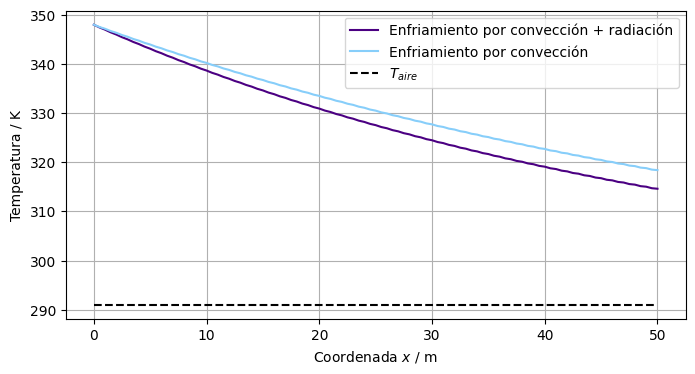

In [ ]:
# Opcional: grafique el perfil de temperatura
fig = plt.subplots(figsize=[8,4])

plt.plot(x_grilla, T, color='indigo',label='Enfriamiento por convección + radiación')
plt.plot(x_grilla, Tconv, 'lightskyblue',label='Enfriamiento por convección')
plt.plot(x_grilla, x_grilla*0+T_aire, 'k--',label='$T_{aire}$')

plt.grid()
plt.legend(fontsize = 10)
plt.tick_params(labelsize = 10)
plt.xlabel('Coordenada $x$ / m')
plt.ylabel('Temperatura / K')

plt.show()

## Preguntas quiz

¿Cuál es la temperatura de salida del agua del radiador?

In [ ]:
# Escriba el código para resolver la pregunta
print(f"Temperatura de salida del agua del radiador: {T[-1]:.2f} K")


Temperatura de salida del agua del radiador: 314.61 K


#### Calcule la temperatura promedio del agua en el radiador

*Ayuda*: la función np.trapz(y,x) calcula mediante el método trapezoidal la aproximación numérica de la integral de una función evaluada en una grilla. Los puntos de la grilla están contenidos en la `np.array` "`x`" y la función evaluada en la grilla se almacena en la `np.array` "`y`".

In [ ]:
# Código de resolución
T_promedio = np.trapz(T,x_grilla)/L

print(f"Temperatura promedio del agua en el radiador: {T_promedio:.2f} K")

Temperatura promedio del agua en el radiador: 328.76 K


#### Calcule el flujo de calor removido por convección natural
Reporte sus resultados en kW

In [ ]:
# Cálculo del flujo de calor removido por convección natural

# Volumen del fluido dentro de la rendija
volumen_fluido = L * B * W  # m^3

# Término de convección natural (en W/m3)
Q_conv_term = 2 * h * (T - T_aire) / B

# Promedio del término de convección natural a lo largo de la rendija
Q_conv_term_promedio = np.mean(Q_conv_term)

# Flujo de calor removido por convección natural (en W)
Q_conv = Q_conv_term_promedio * volumen_fluido

# Conversión a kilovatios
Q_conv_kW = Q_conv / 1000  # kW

# Resultado
print(f"Flujo de calor removido por convección natural: {Q_conv_kW:.1f} kW")

Flujo de calor removido por convección natural: 113.4 kW


#### Calcule la razón entre el flujo de calor removido por radiación y el flujo de calor total
Reporte sus resultados como porcentaje, igual a $100 \cdot r \%$. Por ejemplo, si $r = 0.01$, esto corresponde a 1% y usted debe ingresar el valor numérico 1

In [ ]:
# Cálculo del flujo de calor removido por radiación

# Término de radiación (en W/m3)
Q_rad_term = 2 * em * sigma * (T**4 - T_aire**4) / B

# Promedio del término de radiación a lo largo de la rendija
Q_rad_term_promedio = np.mean(Q_rad_term)

# Flujo de calor removido por radiación (en W)
Q_rad = Q_rad_term_promedio * volumen_fluido

# Conversión a kilovatios
Q_rad_kW = Q_rad / 1000  # kW

# Flujo de calor total removido (convección + radiación)
Q_total = Q_conv + Q_rad

# Razón entre el flujo de calor removido por radiación y el flujo de calor total
razon_Q_rad_Q_total = Q_rad / Q_total

# Resultados
print(f"Flujo de calor removido por radiación: {Q_rad_kW:.1f} kW")
print(f"Razón entre el flujo de calor removido por radiación y el flujo de calor total: {razon_Q_rad_Q_total:.3f}")

Flujo de calor removido por radiación: 23.4 kW
Razón entre el flujo de calor removido por radiación y el flujo de calor total: 0.171


Repita sus cálculos considerando que el coeficiente de transferencia de calor por convección natural es $h = 30 W m^{-2} K^{-1}$. ¿Cuál es la nueva razón entre el flujo de calor removido por radiación y el flujo de calor total removido?